In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
Ramen = pd.read_csv('Ramen-ratings.csv')

In [3]:
Ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
Ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


## **Look into average Stars by Countries**

In [5]:
Ramen["Stars"] = pd.to_numeric(Ramen["Stars"], errors="coerce")

In [6]:
Ramen_stars = Ramen.groupby('Country').mean()['Stars']

In [7]:
Ramen_stars = pd.DataFrame(Ramen_stars)

In [8]:
Ramen_stars=Ramen_stars.sort_values(by='Stars',ascending=True)

In [9]:
Ramen_stars

,Stars
Country,
Nigeria,1.500000
Canada,2.243902
Netherlands,2.483333
UK,2.997101
Pakistan,3.000000
Australia,3.138636
Vietnam,3.187963
Sweden,3.250000
Colombia,3.291667


In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Which countries are at top and bottom?')

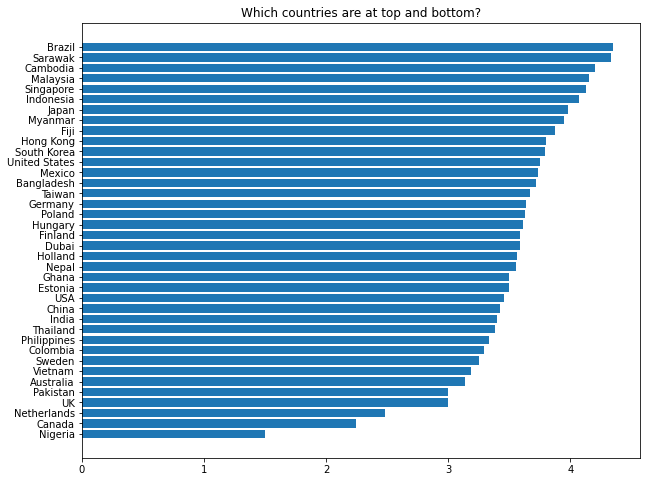

In [11]:
plt.figure(figsize=(10,8))
plt.barh(Ramen_stars.index,Ramen_stars['Stars'] )
plt.title('Which countries are at top and bottom?')

In [12]:
Ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


## Comparision between Japan and US

In [13]:
Ramen_Japan = Ramen[Ramen['Country']=='Japan']

In [14]:
Ramen_Japan

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.50,NaN
...,...,...,...,...,...,...,...
2554,26,Nissin,Soba Noodles With Mayo Mustard Squirt,Pack,Japan,4.00,NaN
2555,25,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,3.00,NaN
2556,24,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.00,NaN
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.00,2012 #4


In [15]:
Ramen_Japan_Stars = Ramen_Japan.groupby('Brand').mean()['Stars']

In [16]:
Ramen_Japan_Stars = pd.DataFrame(Ramen_Japan_Stars)

In [17]:
Ramen_US = Ramen[Ramen['Country']=='USA']

In [18]:
Ramen_US_Stars= Ramen_US.groupby('Brand').mean()['Stars']

In [19]:
Ramen_US_Stars = pd.DataFrame(Ramen_US_Stars)

In [20]:
Ramen_Japan_Stars=Ramen_Japan_Stars.rename(columns={'Stars':'Japan_Stars'})

In [21]:
Ramen_US_Stars=Ramen_US_Stars.rename(columns={'Stars':'US_Stars'})

In [22]:
Ramen_Japan_US= pd.merge(Ramen_Japan_Stars,Ramen_US_Stars,on='Brand')

In [23]:
Ramen_Japan_US

,Japan_Stars,US_Stars
Brand,,
Maruchan,3.940217,3.392157
Myojo,3.713415,3.625000
Nissin,4.259910,3.496053
Sapporo Ichiban,3.910714,3.600000
Shirakiku,3.464286,3.000000


Text(0.5, 1.0, 'Company wise stars comparision for Japan and US')

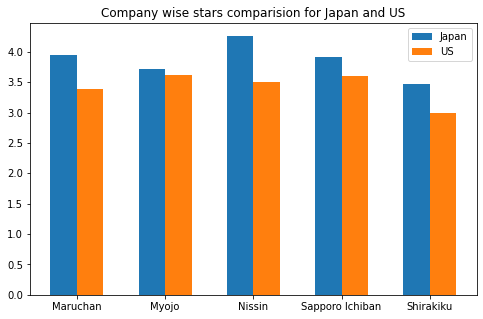

In [24]:
plt.figure(figsize=(8,5))
plt.bar(Ramen_Japan_US.index, Ramen_Japan_US['Japan_Stars'], width=-0.3, label='Japan', align="edge")
plt.bar(Ramen_Japan_US.index, Ramen_Japan_US['US_Stars'], width=0.3, label='US',align='edge')
plt.legend()
plt.title('Company wise stars comparision for Japan and US')

**Compared to the United States, Japan has higher score for each and every brand.**

In [25]:
Ramen.groupby('Country').count()['Review #'].sort_values(ascending=False)

Country
Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Holland            4
Fiji               4
Poland             4
Sarawak            3
Dubai              3
Sweden             3
Finland            3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Review #, dtype: int64

**The dataset has most reviews from Japan**

In [26]:
Ramen2 = Ramen.groupby(['Brand','Country']).count()['Review #'].sort_values(ascending=False)

In [27]:
Ramen2 = pd.DataFrame(Ramen2)

In [28]:
Ramen2

Review #
Brand           Country              
Nissin          Japan             111
                USA                95
                Hong Kong          67
Paldo           South Korea        65
Mama            Thailand           58
...                               ...
Sanyo Foods     Japan               1
Sao Tao         China               1
Liang Cheng Mai China               1
Sapporo Ichiban Canada              1
1 To 3 Noodles  India               1

[423 rows x 1 columns]

In [29]:
Ramen2.reset_index(inplace= True)
Ramen2 = Ramen2.rename(columns={'index': 'Items'})

In [30]:
Ramen2

,Brand,Country,Review #
0,Nissin,Japan,111
1,Nissin,USA,95
2,Nissin,Hong Kong,67
3,Paldo,South Korea,65
4,Mama,Thailand,58
...,...,...,...
418,Sanyo Foods,Japan,1
419,Sao Tao,China,1
420,Liang Cheng Mai,China,1
421,Sapporo Ichiban,Canada,1


**In how many countries is each brand eaten ??**

In [31]:
brand_country = Ramen2.groupby('Brand').count()['Country'].sort_values(ascending=False)

In how many countries is Nissin eaten ?

In [32]:
brand_country = pd.DataFrame(brand_country)
brand_country = brand_country.rename(columns={'Country':'Country number'})
brand_country.head(5)

,Country number
Brand,
Nissin,14
Maggi,5
Mama,4
MAMA,4
Nongshim,4


Text(0.5, 1.0, 'Brand and Number of countries where Ramen Noodles are being eaten')

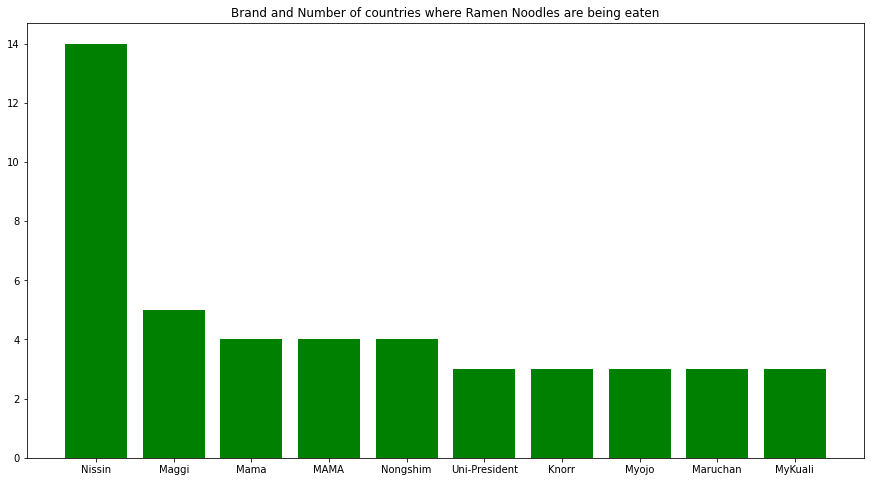

In [33]:
brand_country_top10 = brand_country.head(10)
plt.figure(figsize=(15,8))
plt.bar(brand_country_top10.index,brand_country_top10['Country number'],color='green')
plt.title('Brand and Number of countries where Ramen Noodles are being eaten')

**It suggests that Nissin is widely eaten in the world compared to other brands**

## **Nissin Specific**

In [34]:
Ramen3 = Ramen2[Ramen2['Brand']=='Nissin']

In [35]:
Ramen3

,Brand,Country,Review #
0,Nissin,Japan,111
1,Nissin,USA,95
2,Nissin,Hong Kong,67
17,Nissin,Singapore,27
22,Nissin,Germany,22
28,Nissin,Mexico,18
29,Nissin,Thailand,17
101,Nissin,Colombia,6
103,Nissin,India,6
125,Nissin,Brazil,5


In [36]:
Ramen_Nissin = Ramen[Ramen['Brand']=='Nissin']

In [37]:
Ramen_Nissin

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.50,NaN
14,2566,Nissin,Demae Ramen Bar Noodle Aka Tonkotsu Flavour In...,Pack,Hong Kong,5.00,NaN
20,2560,Nissin,Cup Noodles Laksa Flavour,Cup,Hong Kong,4.25,NaN
27,2553,Nissin,Hakata Ramen Noodle White Tonkotsu,Bowl,Japan,4.75,NaN
...,...,...,...,...,...,...,...
2553,27,Nissin,Demae Ramen Curry Flavor,Pack,Japan,4.00,NaN
2554,26,Nissin,Soba Noodles With Mayo Mustard Squirt,Pack,Japan,4.00,NaN
2555,25,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,3.00,NaN
2556,24,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.00,NaN


In [38]:
Ramen_Nissin_Stars = Ramen_Nissin.groupby('Country').mean()['Stars'].sort_values(ascending=False)

Text(0.5, 1.0, 'How many stars did Nissin get in each country?')

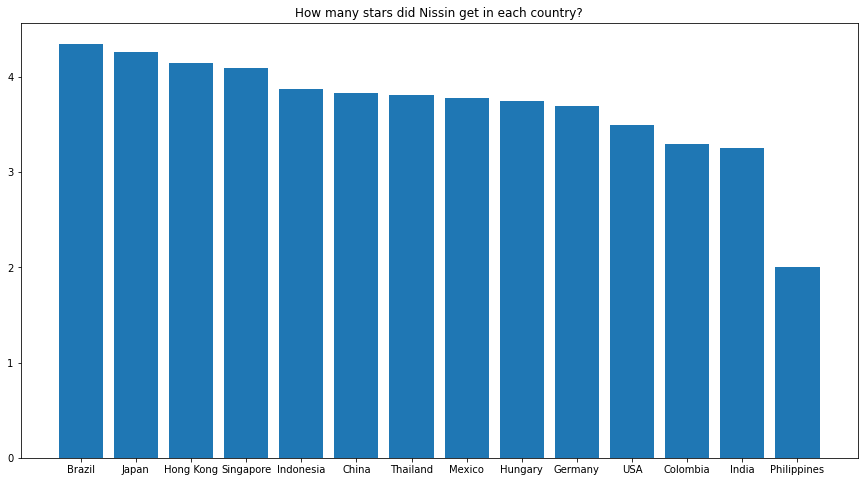

In [39]:
plt.figure(figsize=(15,8))
plt.bar(Ramen_Nissin_Stars.index,Ramen_Nissin_Stars)
plt.title('How many stars did Nissin get in each country?')

## Focus on Maggi

In [40]:
Ramen_Maggi = Ramen[Ramen['Brand']=='Maggi']

In [41]:
Ramen_Maggi_Stars = Ramen_Maggi.groupby('Country').mean()['Stars'].sort_values(ascending=False)

In [42]:
Ramen_Maggi_Stars

Country
Australia    5.000000
Singapore    4.250000
Malaysia     3.956250
Fiji         3.625000
India        3.232143
Name: Stars, dtype: float64

Text(0.5, 1.0, 'Country wise Maggi star ratings')

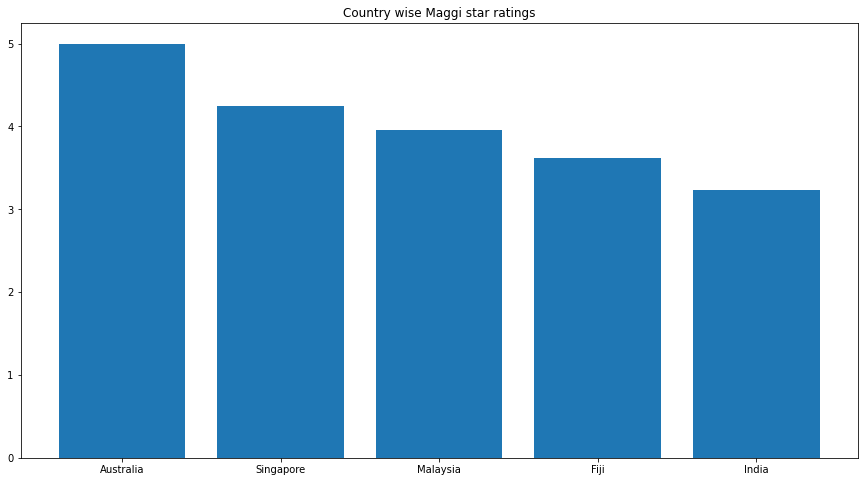

In [43]:
plt.figure(figsize=(15,8))
plt.bar(Ramen_Maggi_Stars.index,Ramen_Maggi_Stars)
plt.title('Country wise Maggi star ratings')

## Check top Ramens of 2016 

In [44]:
Ramen['Top Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

In [45]:
Ramen[Ramen['Top Ten'].str.contains("2016",na=False)]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.0,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.0,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.0,2016 #7


## Which country likes spicy Ramen??

In [46]:
Ramen_spicy = Ramen[Ramen['Variety'].str.contains("spicy|Spicy",na=False)]

In [47]:
Ramen_spicy.sort_values('Stars',ascending=False)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
926,1654,MyOri,Malaysia Penang White Curry Noodle Super Spicy,Pack,Malaysia,5.00,NaN
262,2318,Happy Cook,Sichuan Spicy Flavor,Pack,Taiwan,5.00,NaN
276,2304,Maggi,2 Minute Noodles Masala Spicy,Pack,India,5.00,NaN
955,1625,Mama,Instant Rice Noodle Soup Spicy Shrimp Flavour,Bowl,Thailand,5.00,NaN
679,1901,Prima,Juzz's Mee Original Spicy Flavour,Pack,Singapore,5.00,NaN
...,...,...,...,...,...,...,...
182,2398,Liang Cheng Mai,Shaanxi Cold Noodle: Mustard Spicy,Tray,China,1.00,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2208,372,Noodle Time,Spicy Thai,Bowl,Canada,0.50,NaN
174,2406,Sichuan Guangyou,Sweet Potato Instant Noodle Braised Spicy Chit...,Pack,China,0.25,NaN


In [48]:
Ramen_spicy_country=Ramen_spicy.groupby('Country').count()['Stars'].sort_values(ascending=False)
Ramen_spicy_country = pd.DataFrame(Ramen_spicy_country)
Ramen_spicy_country_10 = Ramen_spicy_country.head(10)

In [49]:
Ramen_country=Ramen.groupby('Country').count()['Stars'].sort_values(ascending=False)
Ramen_country = pd.DataFrame(Ramen_country)
Ramen_country_10= Ramen_country.head(10)
Ramen_country_10

,Stars
Country,
Japan,352
USA,323
South Korea,307
Taiwan,224
Thailand,191
China,169
Malaysia,155
Hong Kong,137
Indonesia,126


Text(0.5, 1.0, 'The number of reviews of Ramens(TOP10)')

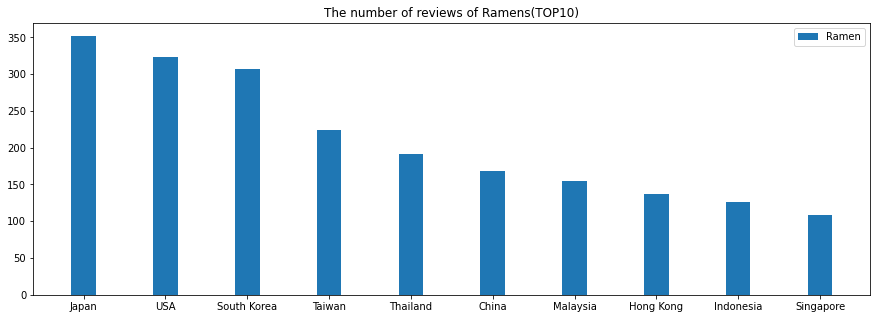

In [50]:
plt.figure(figsize=(15,5))
plt.bar(Ramen_country_10.index, Ramen_country_10['Stars'], width=0.3, label='Ramen', align="center")
plt.legend()
plt.title('The number of reviews of Ramens(TOP10)')

Text(0.5, 1.0, 'The number of reviews of spicy Ramens(TOP10)')

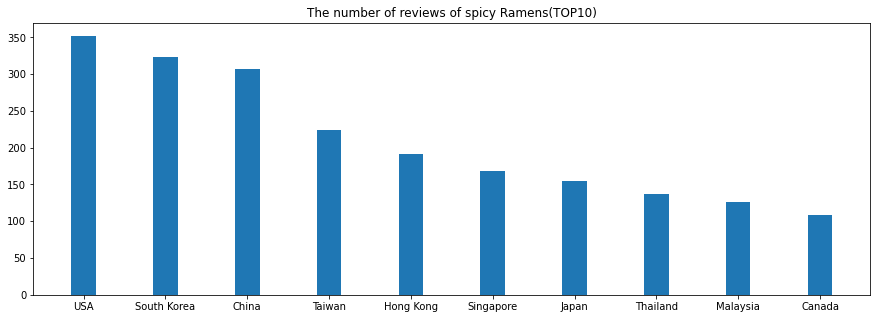

In [51]:
plt.figure(figsize=(15,5))
plt.bar(Ramen_spicy_country_10.index, Ramen_country_10['Stars'], width=0.3, label='spicy',align='center')
plt.title('The number of reviews of spicy Ramens(TOP10)')

Japan is located at the 7th when it comes to spicy Ramen, even though it is located at first place when including all kinds of Ramens.<br>
<br>
Instead,South Korea locates at the second place in case of spicy Ramen.<br>
<br>
Japanese people tend to eat normal Ramen and South Korean and Chinese tend to eat spicy Ramen presumably

## Is there difference of Stars between styles(bowl,cup,..etc) ? 

In [52]:
import seaborn as sns

Text(0.5, 1.0, 'Which style has higher score on average?')

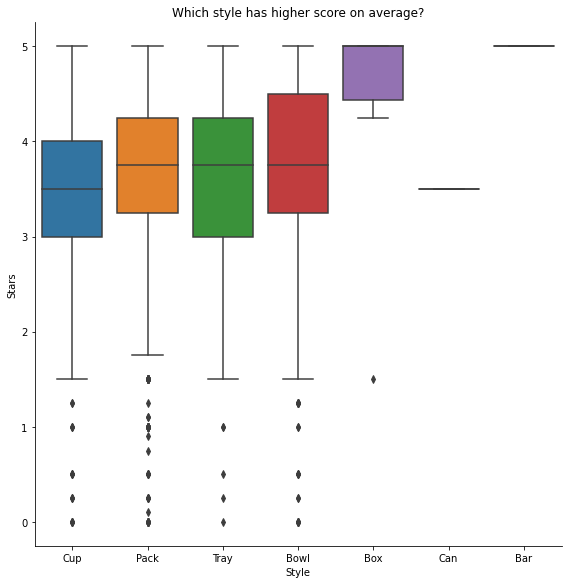

In [53]:
sns.catplot(x='Style', y='Stars', data=Ramen, kind='box',height=8,aspect=1)
plt.title("Which style has higher score on average?", fontsize=12)

Box style is rare, so you cannot really believe this graph, but about other styles, it seems that Bowl Style got higher score than other styles.

Text(0.5, 1.0, 'Which style of Nissin Ramen has higher score ?')

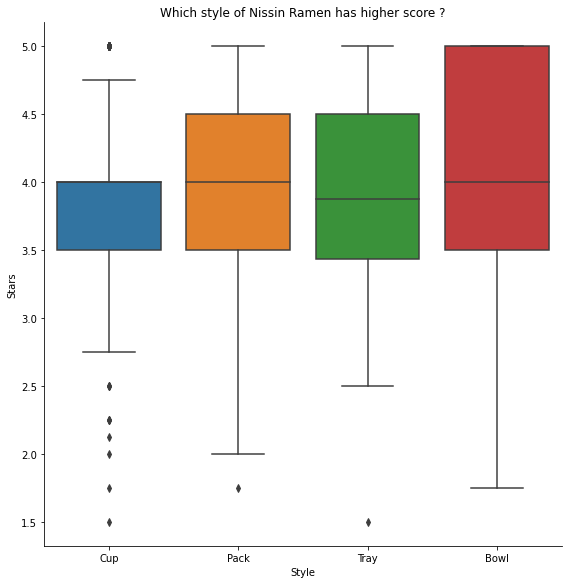

In [54]:
sns.catplot(x='Style', y='Stars', data=Ramen_Nissin, kind='box',height=8,aspect=1, order=['Cup','Pack','Tray','Bowl'])
plt.title("Which style of Nissin Ramen has higher score ?", fontsize=12)

When focusing only on Nissin Ramen, the results seems pretty similar.